In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 8:  Linear Algebra Part 2

## Question 1

We know that interpolation using equispaced points is not ideal but we can also show that it is ill-conditioned.  To illustrate this let $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ by $n$ and $m$ equispaced points from $-1$ to $1$ repectively.

**(a)** [15] Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{\mathcal{P}(y_j)\}$, where $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data.

Solution: Let the $n$-vector data at {$x_j$} be $\mathcal{P}(x)$, where
$$ \mathcal{P}(x) = \begin{bmatrix} \mathcal{P}(x_1) \\ \mathcal{P}(x_2) \\ \mathcal{P}(x_3) \\ \vdots \\ \mathcal{P}(x_n) \end{bmatrix}
$$
What we need is an matrix $A$, such that 
$$ A \mathcal{P}(x) = \mathcal{P}(y)
$$
For both ${x_i}$ and ${y_j}$, subtract the coefficients of the polynomial interpolant, which are $c_p$, then:

let the Vandermonde matrix of the interpolant $\mathcal{P}$ by set $\{y_j\}$ be $V_y$, and clearly we have 
$$ V_y c_p = \mathcal{P}(y)
$$
also, let the Vandermonde matrix of the interpolant $\mathcal{P}$ by set $\{x_i\}$ be $V_x$, and we have
$$ V_x c_p = \mathcal{P}(x)
$$
Now, since 
$$ A V_x c_p = A \mathcal{P}(x) = \mathcal{P}(y) = V_y c_p
$$
we derive the formula for the $m \times n$ matrix $A$ as
$$ A = V_y V_x^{-1}
$$

**(b)** [10] Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1, 2, \ldots, 30$, $m=2n-1$.  In the continuous limit $m \rightarrow \infty$.  The numbers $||A||_\infty$ we have seen before and are another way to compute the Lebesgue constants for equispaced interpolation, which are asymptotic to $2^n / (e(n-1) \log n)$ as $n \rightarrow \infty$.

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


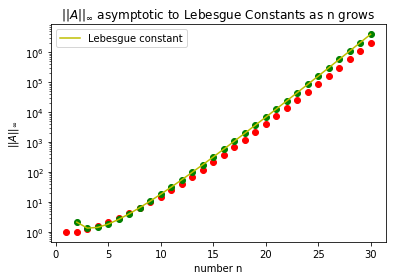

In [9]:
n = 30
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.0)
fig.set_figheight(fig.get_figheight() * 1.0)

axes = fig.add_subplot(1, 1, 1)
for i in range(1, n+1):
    x = numpy.linspace(-1, 1, i)
    Vx = numpy.vander(x)
    
    y = numpy.linspace(-1, 1, 2 * i - 1)
    Vy = numpy.vander(y)[:, i-1:]
    
    # use numpy.dot to calculate formula
    A = numpy.dot(Vy, numpy.linalg.inv(Vx))

    # plot ||A||_infty 
    axes.semilogy(i, numpy.linalg.norm(A, ord=numpy.infty), 'ro')
    # plot Lebesgue constants
for j in range(2, n+1):
    axes.semilogy(j, 2.0**j / (numpy.exp(1) * (j - 1.0) * numpy.log(j)), 'go')

n_1 = numpy.arange(2, 31)
axes.semilogy(n_1[0:], 2.0**n_1[0:] / (numpy.exp(1) * (n_1[0:] - 1.0) * numpy.log(n_1[0:])), 'y', label = 'Lebesgue constant')
        
axes.set_title("$||A||_\infty$ asymptotic to Lebesgue Constants as n grows")
axes.set_xlabel("number n")
axes.set_ylabel("$||A||_\infty$")
axes.legend()



plt.show()

**(c)** [25] Derive a general way to compute the $\infty$-norm condition number $\kappa$ of the problem of interpolating the function $f(x) = 1$.  Plot the result for $n=1,2,\ldots,30$ and $m=2n-1$.  Hint:  Use the expression we found involving the Jacobian.

Solution: let $f(x) = \mathcal{P}(x) = 1$, then for set $\{x_i\}$, 
$$ Ax = \begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
$$
That means for the $\infty$ norm, $||Ax||_{\infty}$ = 1 = $||x||_{\infty}$. From the condition number $\kappa$,
$$ \kappa = \frac{||J(x)||_{\infty}}{\frac{||Ax||_{\infty}}{||x||_{\infty}}}
$$
and $||J(x)||_{\infty}$ = $||A||_{\infty}$, we know that $\kappa = ||A||_{\infty}$.
That means the way to compute the $\infty$-norm condition number $\kappa$ of interpolating the function $f(x) = 1$ is to give the $||A||_{\infty}$.

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


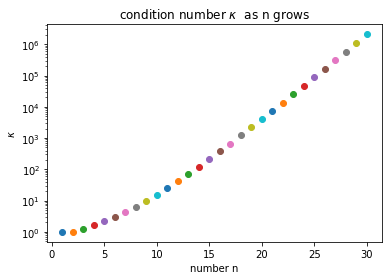

In [105]:
n = numpy.arange(1, 31)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.0)
fig.set_figheight(fig.get_figheight() * 1.0)
axes = fig.add_subplot(1, 1, 1) 

for i in n:
    x = numpy.linspace(-1, 1, i)
    Vx = numpy.vander(x)
    
    y = numpy.linspace(-1, 1, 2 * i - 1)
    Vy = numpy.vander(y)[:, i-1:]
    
    # use numpy.dot to calculate formula
    k = numpy.dot(Vy, numpy.linalg.inv(Vx))
    # plot \kappa 
    axes.semilogy(i, numpy.linalg.norm(k, ord=numpy.infty), 'o')

axes.set_title("condition number $\kappa$  as n grows")
axes.set_xlabel("number n")
axes.set_ylabel("$\kappa$")
plt.show()

## Question 2 - LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.  Make sure to read the lecture on Gaussian elimination when doing this question.

**(a)** (10 points) By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

Solution: follow the definition and rule to derive some obvious elements in both matrices $L$ and $U$ by 
$$ u_{1j} = a_{1j} ~~~~ l_{i1} = \frac{a_{i1}}{u_{11}}
$$
for $a_{ij} \in A$, $l_{ij} \in L$, $u_{ij} \in U$.

$\Rightarrow$
$$ L = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 4 & \star & 1 \end{bmatrix} ~~~~ U = \begin{bmatrix} 4 & 8 & 1 \\ 0 & \star & \star \\ 0 & 0 & \star \end{bmatrix}
$$
and the rest elements can be derived directly by multiplication of matrix:

$$ L = \begin{bmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 4 & 1 & 1 \end{bmatrix} ~~~~ U = \begin{bmatrix} 4 & 8 & 1 \\ 0 & 4 & 2 \\ 0 & 0 & 1 \end{bmatrix}
$$

**(b)** [20] Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [35]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row


def LU_factorization(A):
    # U=A L=A=I
    U = A.copy()
    L = numpy.identity(A.shape[0]) 
    P = numpy.identity(A.shape[0]) 
    for k in range(A.shape[0]):
        # Select i >= k to maximize |u_{i,k}|
        pivot_i = numpy.argmax(numpy.abs(U[k:, k])) + k
        # U[k, k:m] <==> U[i, k:m]
        # L[k, 1:k-1] <==> L[i, 1:k-1]
        # P[k, :] <==> P[i, :]
        swap_rows(pivot_i, k, U, column_indices=(k, A.shape[0]))
        swap_rows(pivot_i, k, L, column_indices=(0, k))
        swap_rows(pivot_i, k, P)
        # L[j, k] = U[j, k] / U[k, k]
        # U[j, k:m] = U[j, k:m] - L[j, k] * U[k, k:m]
        for j in range(k + 1, A.shape[0]):
            L[j, k] = U[j, k] / U[k, k]
            U[j, k:A.shape[0]] = U[j, k:A.shape[0]] - L[j, k] * U[k, k:A.shape[0]]

    return P, L, U

In [36]:
import scipy.linalg
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print("Success!")

Success!


**(c)** [15] For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` other than to check your solution.

In [81]:
def solve(A, b):
    P, L, U = LU_factorization(A)
    # Ux = y; Ly = Pb
    # Forward substitution from 1st row downward
    # y origin and L is still lower trig
    y = numpy.dot(P, b) 
    for i in range(A.shape[0]):
        for j in range(i):
            # until the diagonal one
            y[i] = y[i] - L[i, j] * y[j]

    # Backward renew
    x = y
    # from last row upward
    # since U is still upper trig
    for i in range(A.shape[0]-1, -1, -1):
        for j in range(i+1, A.shape[0]):
        #for j in range(A.shape[0]-1, i, -1): 
            x[i] -= U[i, j] * x[j]
        x[i] = x[i] / U[i,i]
    
    return x

In [82]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print("Success!")

Success!


## Question 3 - QR and Least-Squares

[20] Using either the modified Grahm-Schmidt orthogonalization or Householder triangularization write a function that solves the least-squares problem given a set of data an a polynomial order.  Note that this is basically the same question as before from homework 6 except this time we want to use QR factorization.  This time we have provided a plotting function should you want to use it.  Compute the resulting linear system using the appropriate substitution from question 2.

In [39]:
def mod_GS(A):
    m = A.shape[0]
    n = A.shape[1]
    Q = numpy.empty((m, n))
    R = numpy.zeros((n, n))
    v = A.copy()
    for i in range(n):
        R[i, i] = numpy.linalg.norm(v[:, i], ord=2)
        Q[:, i] = v[:, i] / R[i, i]
        for j in range(i + 1, n):
            R[i, j] = numpy.dot(Q[:, i].conjugate(), v[:, j])
            v[:, j] -= R[i, j] * Q[:, i]
    return Q, R
#p = numpy.linalg.solve(numpy.dot(A.transpose(), A), numpy.dot(A.transpose(), y))


def compute_lstsq(data, n):
    #m = data.shape[0]
    A = numpy.empty((data.shape[0], n+1))
    for j in range(n+1):
        A[:, j] = data[:, 0] **(j)
    Q, R = mod_GS(A)
    #x = data[:, 0]
    b = data[:, 1]

    p = numpy.linalg.solve(R, numpy.dot(Q.transpose(), b))
    return p

def plot_lstsq(data, x, p):
    P = numpy.zeros(100)
    for n in range(p.shape[0]):
        P += p[n] * x**n
        
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(data[:, 0], data[:, 1], 'ko', label='data')
    axes.plot(x, P, 'r', label='interpolant')
    axes.set_title("Interpolant of order %s for %s data points" % (N - 1, N))
    axes.set_xlabel("$x$")
    axes.set_ylabel("$P(x)$ and data")
    axes.legend()

Success!


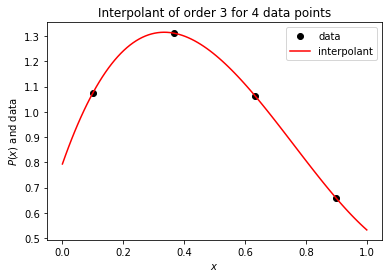

In [40]:
N = 4
N_p = 3
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
p = compute_lstsq(data, N_p)
A = numpy.vander(data[:,0], N_p + 1)
# numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
print("Success!")

# Plot result
x = numpy.linspace(0.0, 1.0, 100)
plot_lstsq(data, x, p)
plt.show()

Success!


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


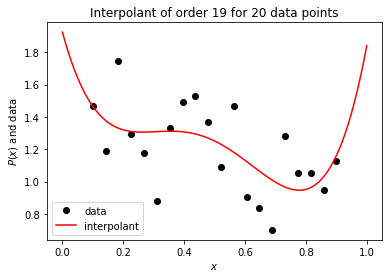

In [41]:
N = 20
N_p = 4
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
p = compute_lstsq(data, N_p)
A = numpy.vander(data[:,0], N_p + 1)
numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
print("Success!")

# Plot result
x = numpy.linspace(0.0, 1.0, 100)
plot_lstsq(data, x, p)
plt.show()